In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('C:/Users/styli/downloads/Mental Health prediction/Mental Health Data.csv')

In [6]:
# Remove duplicates
df.drop_duplicates(inplace=True)
print("Number of remaining records:", df.shape[0])

Number of remaining records: 1433


In [43]:
## checking the dataframe
df.head(n=2)

,self_employed,no_of_employees,tech_company,role_IT,mental_healthcare_coverage,knowledge_about_mental_healthcare_options_workplace,employer_discussed_mental_health,employer_offer_resources_to_learn_about_mental_health,medical_leave_from_work,comfortable_discussing_with_coworkers,...,while_effective_treatment_mental_health_issue_interferes_work,while_not_effective_treatment_interferes_work,age,gender,country,US state,country work,US state work,role_in_company,work_remotely
0,0,1 to 5,1.0,NaN,Yes,Yes,No,No,Somewhat difficult,Maybe,...,Sometimes,Often,33,Male,Canada,NaN,Canada,NaN,Back-end Developer,Sometimes
1,0,1 to 5,1.0,NaN,No,No,No,I don't know,Very easy,Yes,...,Not applicable to me,Not applicable to me,40,male,Netherlands,NaN,Netherlands,NaN,Front-end Developer|Back-end Developer,Sometimes


In [44]:
## Rename the columns
a=list(df.columns)
b=['self_employed','no_of_employees','tech_company','role_IT','mental_healthcare_coverage',
  'knowledge_about_mental_healthcare_options_workplace','employer_discussed_mental_health ',
  'employer_offer_resources_to_learn_about_mental_health','medical_leave_from_work ',
  'comfortable_discussing_with_coworkers','employer_take_mental_health_seriously',
   'knowledge_of_local_online_resources ','productivity_affected_by_mental_health ',
   'percentage_work_time_affected_mental_health','openess_of_family_friends',
  'family_history_mental_illness','mental_health_disorder_past',
   'currently_mental_health_disorder','diagnosed_mental_health_condition',
   'type_of_disorder','treatment_from_professional',
   'while_effective_treatment_mental_health_issue_interferes_work',
  'while_not_effective_treatment_interferes_work ','age','gender','country','US state',
  'country work ','US state work','role_in_company','work_remotely','']
for i,j in zip(a,b):
    df.rename(columns={i:j},inplace=True)

In [45]:
# Check for missing values
missing_values = df.isna().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
self_employed                                                       0
no_of_employees                                                   287
tech_company                                                      287
role_IT                                                          1170
mental_healthcare_coverage                                        287
knowledge_about_mental_healthcare_options_workplace               420
employer_discussed_mental_health                                  287
employer_offer_resources_to_learn_about_mental_health             287
medical_leave_from_work                                           287
comfortable_discussing_with_coworkers                             287
employer_take_mental_health_seriously                             287
knowledge_of_local_online_resources                              1146
productivity_affected_by_mental_health                           1146
percentage_work_time_affected_mental_health                    

In [46]:
## copy the dataset in df1
df1=df.copy()

In [47]:
print(df1.columns)

Index(['self_employed', 'no_of_employees', 'tech_company', 'role_IT',
       'mental_healthcare_coverage',
       'knowledge_about_mental_healthcare_options_workplace',
       'employer_discussed_mental_health ',
       'employer_offer_resources_to_learn_about_mental_health',
       'medical_leave_from_work ', 'comfortable_discussing_with_coworkers',
       'employer_take_mental_health_seriously',
       'knowledge_of_local_online_resources ',
       'productivity_affected_by_mental_health ',
       'percentage_work_time_affected_mental_health',
       'openess_of_family_friends', 'family_history_mental_illness',
       'mental_health_disorder_past', 'currently_mental_health_disorder',
       'diagnosed_mental_health_condition', 'type_of_disorder',
       'treatment_from_professional',
       'while_effective_treatment_mental_health_issue_interferes_work',
       'while_not_effective_treatment_interferes_work ', 'age', 'gender',
       'country', 'US state', 'country work ', 'US state 

In [48]:
## Drop the unnecessary colums 
cols_to_drop = ['role_IT', 'knowledge_of_local_online_resources ', 'productivity_affected_by_mental_health ', 
                'percentage_work_time_affected_mental_health']
df_red = df1.drop(cols_to_drop, axis=1)

In [49]:
print(df_red.columns)

Index(['self_employed', 'no_of_employees', 'tech_company',
       'mental_healthcare_coverage',
       'knowledge_about_mental_healthcare_options_workplace',
       'employer_discussed_mental_health ',
       'employer_offer_resources_to_learn_about_mental_health',
       'medical_leave_from_work ', 'comfortable_discussing_with_coworkers',
       'employer_take_mental_health_seriously', 'openess_of_family_friends',
       'family_history_mental_illness', 'mental_health_disorder_past',
       'currently_mental_health_disorder', 'diagnosed_mental_health_condition',
       'type_of_disorder', 'treatment_from_professional',
       'while_effective_treatment_mental_health_issue_interferes_work',
       'while_not_effective_treatment_interferes_work ', 'age', 'gender',
       'country', 'US state', 'country work ', 'US state work',
       'role_in_company', 'work_remotely'],
      dtype='object')


In [50]:
#Cleaning different columns:
 ## No of Employees column
df_red.no_of_employees.unique()   


array(['1 to 5', '6 to 25', '26-99', '100-500', '26-100', '500-1000',
       'More than 1000', nan], dtype=object)

In [51]:
df_red.no_of_employees.replace(to_replace=['1 to 5', '6 to 25','More than 1000','26-99'],
                                value=['1-5','6-25','>1000','26-100'],inplace=True)

In [52]:
df_red.no_of_employees.value_counts()

26-100      326
>1000       256
100-500     248
6-25        176
500-1000     80
1-5          60
Name: no_of_employees, dtype: int64

In [53]:
## Cleaning Mental Health Care coverage column
df_red.mental_healthcare_coverage.unique()

array(['Yes', 'No', "I don't know", 'Not eligible for coverage / N/A',
       nan], dtype=object)

In [54]:
df_red.mental_healthcare_coverage.replace(to_replace=['Not eligible for coverage / N/A'],
                                value='No',inplace=True)
df_red.mental_healthcare_coverage.unique()

array(['Yes', 'No', "I don't know", nan], dtype=object)

In [55]:
## Cleaning openess_of_family_friends column
df_red.openess_of_family_friends.unique()

array(['Somewhat open', 'Very open', 'Somewhat not open', 'Neutral',
       'Not applicable to me (I do not have a mental illness)',
       'Not open at all'], dtype=object)

In [56]:
df_red.openess_of_family_friends.replace(to_replace=['Not applicable to me (I do not have a mental illness)']
                                          ,value="I don't know",inplace=True)
df_red.openess_of_family_friends.unique()

array(['Somewhat open', 'Very open', 'Somewhat not open', 'Neutral',
       "I don't know", 'Not open at all'], dtype=object)

In [57]:
## Cleaning the age column remove outliers
med_age = df_red[(df_red['age'] >= 18) | (df_red['age'] <= 75)]['age'].median()
df_red['age'].replace(to_replace = df_red[(df_red['age'] < 18) | (df_red['age'] > 75)]['age'].tolist(),
                          value = med_age, inplace = True)

In [58]:
# Cleaning the gender column
df_red.gender.unique()

array(['Male', 'male', 'F', 'Transitioned, M2F', 'Other/Transfeminine',
       'M', 'female', 'm', 'Female', 'f', 'non-binary', 'woman', 'male ',
       'Male ', 'Bigender', 'Genderfluid (born female)',
       'male 9:1 female, roughly', 'Male (cis)', 'Other', 'Sex is male',
       'genderqueer', 'Human', 'mail', 'Cis-woman',
       'female-bodied; no feelings about gender', 'Transgender woman',
       'Genderfluid', 'female ', 'Male/genderqueer', 'fem', 'Nonbinary',
       ' Female', 'Female ', 'Genderqueer', nan, 'I identify as female.',
       'fm', 'Cis female ', 'female/woman', 'Androgynous', 'man',
       'nb masculine', 'Cisgender Female', 'Woman', 'Cis Male',
       'Female or Multi-Gender Femme', 'Male.', 'Enby', 'Agender',
       'Female (props for making this a freeform field, though)',
       'cis man', 'Female assigned at birth ', 'Cis male', 'Man',
       'none of your business', 'cis male', 'genderqueer woman', 'Queer',
       'Dude', 'Male (trans, FtM)', 'cisdude', 'Gen

In [59]:
df_red['gender'].replace(to_replace = ['Male', 'male', 'Male ', 'M', 'm',
       'man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)', 'Man', 'Sex is male',
       'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'male ',
       'Cis Male', 'Male (trans, FtM)',
       'cisdude', 'cis man', 'MALE'], value = 'male', inplace = True)
df_red['gender'].replace(to_replace = ['Female', 'female', 'I identify as female.', 'female ',
       'Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',
       'Genderfluid (born female)', 'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman',
       'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
       ' Female', 'Cis-woman', 'female-bodied; no feelings about gender',
       'AFAB'], value = 'female', inplace = True)
df_red['gender'].replace(to_replace = ['Bigender', 'non-binary', 'Other/Transfeminine',
       'Androgynous', 'Other', 'nb masculine',
       'none of your business', 'genderqueer', 'Human', 'Genderfluid',
       'Enby', 'genderqueer woman', 'mtf', 'Queer', 'Agender', 'Fluid',
       'Nonbinary', 'human', 'Unicorn', 'Genderqueer',
       'Genderflux demi-girl', 'Transgender woman'], value = 'other', inplace = True)

In [60]:
df_red.gender.unique()

array(['male', 'female', 'other', nan], dtype=object)

In [61]:
## Cleaning the role_in_company
tech_list = []
tech_list.append(df_red[df_red['role_in_company'].str.contains('Back-end')]['role_in_company'].tolist())
tech_list.append(df_red[df_red['role_in_company'].str.contains('Front-end')]['role_in_company'].tolist())
tech_list.append(df_red[df_red['role_in_company'].str.contains('Dev')]['role_in_company'].tolist())
tech_list.append(df_red[df_red['role_in_company'].str.contains('DevOps')]['role_in_company'].tolist())
flat_list = [item for sublist in tech_list for item in sublist]
flat_list = list(dict.fromkeys(flat_list))

In [62]:
 #Replace tech role=1 and other=0 in a new tech role operation
df_red['tech_role']=df_red['role_in_company']
df_red['tech_role'].replace(to_replace=flat_list,value=1,inplace=True)
remain_list=df_red['tech_role'].unique()[1:]
df_red['tech_role'].replace(to_replace=remain_list,value=0,inplace=True)

In [63]:
df_red.tech_role.value_counts()

1    1045
0     388
Name: tech_role, dtype: int64

In [64]:
df_red=df_red.drop(['role_in_company'],axis=1)

In [65]:
#Handling Missing Values
df_rej=pd.concat([df_red['type_of_disorder'],df_red['US state'],df_red['US state work']],axis=1)
df_red=df_red.drop(['type_of_disorder','US state','US state work'],axis=1)

In [66]:
import numpy as np
import pandas as pd


df_red_imputed = df_red.copy()

# Iterate over each column
for column in df_red_imputed.columns:
    # Check if column has missing values represented as empty strings
    if (df_red_imputed[column] == "").sum() > 0:
        # Replace empty strings with NaN
        df_red_imputed[column].replace("", np.nan, inplace=True)
    
    # Calculate the most frequent value in the column
    most_frequent_value = df_red_imputed[column].mode()[0]
    # Fill missing values with the most frequent value
    df_red_imputed[column].fillna(most_frequent_value, inplace=True)


In [67]:
# Concatenate the imputed DataFrame 'df_red_imputed' and 'df_rej'
df_eda = pd.concat([df_red_imputed, df_rej], axis=1)

# Calculate the number of missing values in each column of 'df_eda'
missing_values_count = df_eda.isnull().sum().to_frame()

print(missing_values_count)

                                                      0
self_employed                                         0
no_of_employees                                       0
tech_company                                          0
mental_healthcare_coverage                            0
knowledge_about_mental_healthcare_options_workp...    0
employer_discussed_mental_health                      0
employer_offer_resources_to_learn_about_mental_...    0
medical_leave_from_work                               0
comfortable_discussing_with_coworkers                 0
employer_take_mental_health_seriously                 0
openess_of_family_friends                             0
family_history_mental_illness                         0
mental_health_disorder_past                           0
currently_mental_health_disorder                      0
diagnosed_mental_health_condition                     0
treatment_from_professional                           0
while_effective_treatment_mental_health_issue_i.

Answering the First Question: If a person is self employed then is there a higher chance of mental disorder?

([<matplotlib.patches.Wedge at 0x1c6f041c550>,
 [Text(-0.018092161764598828, 1.0998512052467295, 'No'),
  Text(0.01809216176459845, -1.0998512052467295, 'Yes')],
 [Text(-0.00986845187159936, 0.5999188392254888, '50.523561%'),
  Text(0.009868451871599154, -0.5999188392254888, '49.476439%')])

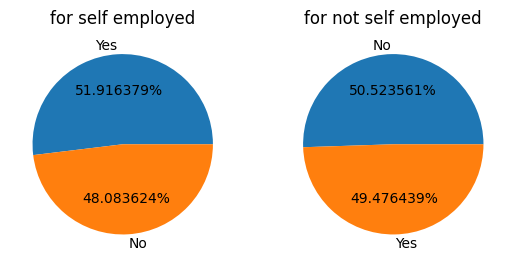

In [68]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.title("for self employed")
plt.pie(df_eda[df_eda.self_employed==1]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.self_employed==1]['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,2,2)
plt.title("for not self employed")
plt.pie(df_eda[df_eda.self_employed==0]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.self_employed==0]['diagnosed_mental_health_condition'].value_counts().index)

From the above pie diagram its clear that its nearly high chances of mental disorder than not self employed

Answering the Second Question :Does big size of the company affect your mental health condition adversely?

Text(0.5, 1.0, 'Mental health in different size companies')

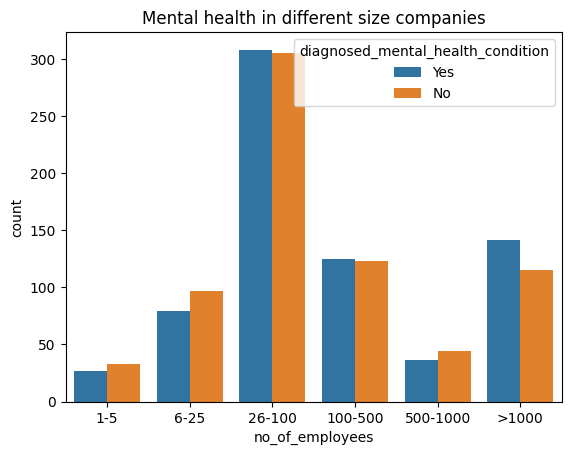

In [69]:
sns.countplot(data=df_eda,x='no_of_employees',hue='diagnosed_mental_health_condition')
plt.title('Mental health in different size companies')

Well , its clear from the graph, that size of the company does not affect directly to mental helath condition adversely.Infact , its inversely proportional i.e small scale company shows higher mental condition

Answering the third question:.  Does working in a tech company affect adversely to your mental wellbeing?

([<matplotlib.patches.Wedge at 0x1c6f055ac10>,
 [Text(-0.019708651065785975, 1.0998234263158642, 'Yes'),
  Text(0.019708754038686934, -1.0998234244706022, 'No')],
 [Text(-0.01075017330861053, 0.5999036870813804, '50.570345%'),
  Text(0.010750229475647417, -0.5999036860748739, '49.429658%')])

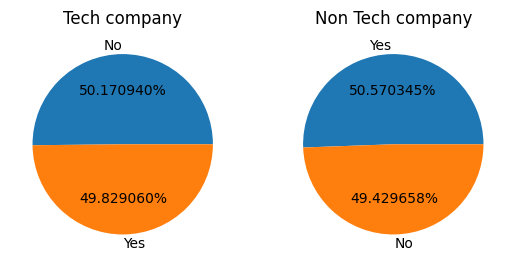

In [70]:
plt.subplot(1,2,1)
plt.title("Tech company")
plt.pie(df_eda[df_eda.tech_company==1]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.tech_company==1]['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Non Tech company")
plt.pie(df_eda[df_eda.tech_company==0]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.tech_company==0]['diagnosed_mental_health_condition'].value_counts().index)

Well, there is no clear indication that tech company affects adversely to your mental wellbeing

Answering the 4th question:Will working remotely helps to better the mental health condition?

([<matplotlib.patches.Wedge at 0x1c6f02f7ad0>,
 [Text(-0.15000672147010105, 1.089723810657449, 'No'),
  Text(0.15000661944279384, -1.089723824702087, 'Yes')],
 [Text(-0.08182184807460056, 0.5943948058131538, '54.354352%'),
  Text(0.08182179242334207, -0.5943948134738656, '45.645645%')])

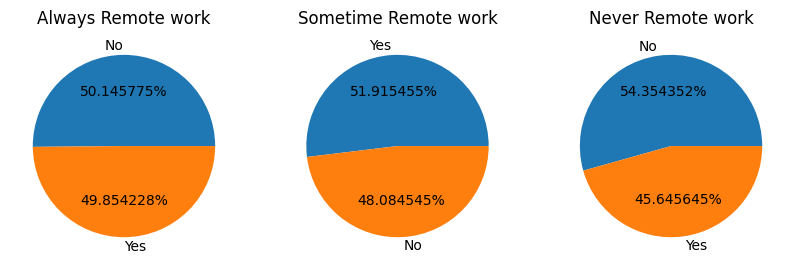

In [71]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("Always Remote work")
plt.pie(df_eda[df_eda.work_remotely=='Always']['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.work_remotely=='Always']['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,3,2)
plt.title("Sometime Remote work")
plt.pie(df_eda[df_eda.work_remotely=='Sometimes']['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.work_remotely=='Sometimes']['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,3,3)
plt.title("Never Remote work")
plt.pie(df_eda[df_eda.work_remotely=='Never']['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.work_remotely=='Never']['diagnosed_mental_health_condition'].value_counts().index)

So, its clear the mix of remote and office is best way for mental well being

Answering the question : Country wise positive disorder cases?

In [72]:
import chart_studio.plotly as py 
import plotly.graph_objs as gobj
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

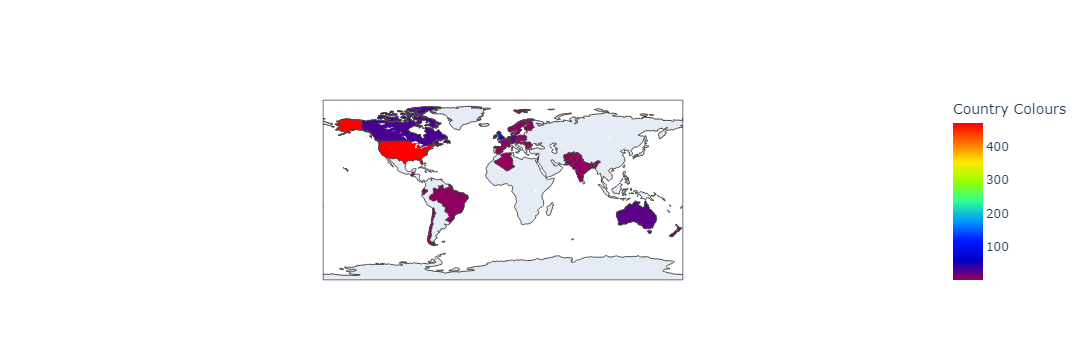

In [73]:
data =dict( type = 'choropleth',
            locations = list(df_eda[df_eda.diagnosed_mental_health_condition=='Yes']['country'].value_counts().index),
            locationmode = 'country names',
            colorscale= 'Rainbow',
            z=list(df_eda[df_eda.diagnosed_mental_health_condition=='Yes']['country'].value_counts()),
            colorbar = {'title':'Country Colours', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'})
col_map=gobj.Figure(data = [data],layout = layout)
iplot(col_map)

Its clear from the map, USA tops the list with whopping 473 cases !!!

Answering the question : Does the tech companies take mental health seriously than other non tech companies?

([<matplotlib.patches.Wedge at 0x1c6f038fb90>,
 [Text(-0.44059807728808054, 1.0079054193177288, 'No'),
  Text(0.1506324301763201, -1.0896374952153474, 'Yes'),
  Text(1.058745387606376, -0.2984262123578033, "I don't know")],
 [Text(-0.24032622397531664, 0.5497665923551248, '63.117874%'),
  Text(0.08216314373253823, -0.5943477246629167, '28.136882%'),
  Text(0.5774974841489323, -0.16277793401334723, '8.745247%')])

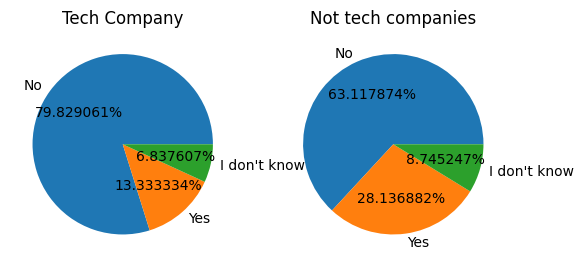

In [74]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.title("Tech Company")
plt.pie(df_eda[df_eda.tech_company==1]['employer_discussed_mental_health '].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.tech_company==1]['employer_discussed_mental_health '].value_counts().index)

plt.subplot(1,2,2)
plt.title("Not tech companies")
plt.pie(df_eda[df_eda.tech_company==0]['employer_discussed_mental_health '].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.tech_company==1]['employer_discussed_mental_health '].value_counts().index)

Clearly ,as it seems tech companies are less concerned about mental health than the non-tech companies which is alarming signal!!

In [ ]:
Answering the question: Which kind of discorder occur most?

<Axes: >

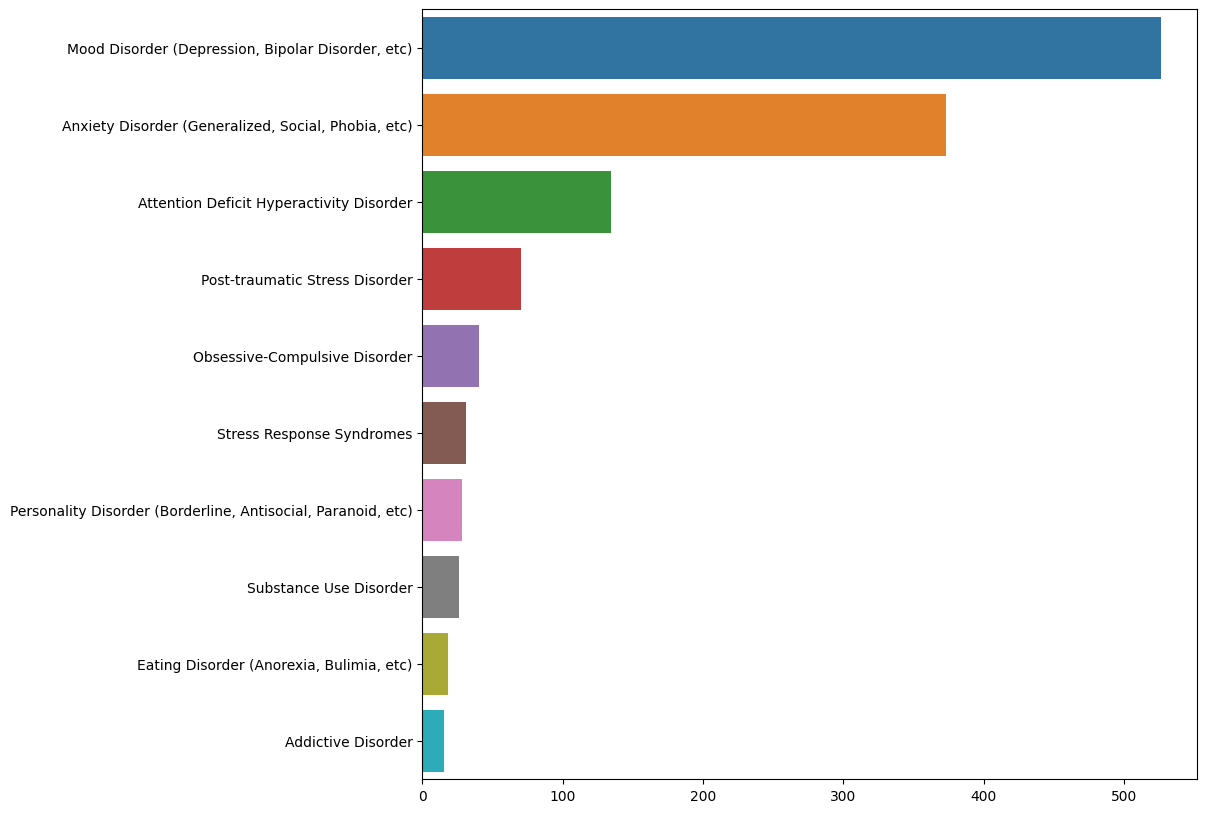

In [75]:
##B.10
disorder_type=pd.DataFrame(
    df_eda[df_eda.type_of_disorder.isnull() != True]['type_of_disorder'].str.split("|").tolist()).stack()
plt.figure(figsize=(10,10))
sns.barplot(x=disorder_type.value_counts()[0:10],y=disorder_type.value_counts().index[0:10])

Its clear, the basic Anxiety disorder tops the list followed by hyperactivity disorder which is alarming and needs to be addressed moving forward!!